# Machine Learning Final Project: Mental Health in Tech Company

#### Chuanlong Pan, Lina Yu Dated:11/21/201

# Introduction

Mental health, as defined by the Public Health Agency of Canada, is an individual’s
capacity to feel, think, and act in ways to achieve a better quality of life whilst respecting
the personal, social, and cultural boundaries. Mental health can affect daily living,
relationships, and physical health. Mental health problems has unprecedented
importance in today’s word, especially in tech companies. Tech companies are
developing at a fast speed and employees in these companies are often under intense
pressure to contribute their skills and knowledge. Poor mental health can cause a range
of physical illness and thus has a direct impact on companies’ business and revenue.
From a manager’s point of view, it’s important to know how to improve employers’
mental health and thus run business better. 

Open Sourcing Mental Illness is a non-profit corporation dedicated to raising awareness,
educating and providing resources to support mental wellness in the tech and open
source communities. Every year, OSMI conducts a survey to measure employers’
attitudes towards mental health in the tech workplace and examines the frequency of
mental health disorders among tech workers.

This project aims to explore wheather we can predict a personal's possibility to seek treatment for mental illness based on information from a survey conducted by OSMI in 2014.

In [199]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize, LabelEncoder

# Models
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [200]:
df = pd.read_csv("survey.csv")

In [201]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

This dataset has 27 columns. Information of this survey can be split into 4 categories:
1.	**Geographic and Demographic information of responders**: e.g. Age, Gender, Country, family history of mental illness

2.	**Relevant information about responder's workspace**: e.g. if the responder is self-employed or not, how many employees of the company, remote work or not

3.	Workspaces’ support for mental health problem: 

*   **benefits**: Does your employer provide mental health benefits? 
*   **care_options**: Do you know the options for mental health care your employer provides?
*   **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program? 
*   **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help? 
*   **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources
*   **leave**: How easy is it for you to take medical leave for a mental health condition? 

4. The survey also asks some possible negative consuquence about mental health occur in workspaces:
* **mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences? 
* **phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences? 
* coworkers: Would you be willing to discuss a mental health issue with your coworkers? 
* **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)? 
* **mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview? 
* **phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview? 
* **mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health? 
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? 

# Data Cleaning

## Check Missing Value

In [203]:
raw_data = df.copy()
null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Count", "Percentage"])
print("Missing value count and percentage: ")
print(null_summary)

Missing value count and percentage: 
                           Count  Percentage
comments                    1095   86.973789
state                        515   40.905481
work_interfere               264   20.969023
self_employed                 18    1.429706
seek_help                      0    0.000000
obs_consequence                0    0.000000
mental_vs_physical             0    0.000000
phys_health_interview          0    0.000000
mental_health_interview        0    0.000000
supervisor                     0    0.000000
coworkers                      0    0.000000
phys_health_consequence        0    0.000000
mental_health_consequence      0    0.000000
leave                          0    0.000000
anonymity                      0    0.000000
Timestamp                      0    0.000000
wellness_program               0    0.000000
Age                            0    0.000000
benefits                       0    0.000000
tech_company                   0    0.000000
remote_work       

## Drop Columns

We simply drop Timestamp column since time and date are irrelevant to the result of this project. 

Because not all the responders wrote down their comments and about 87% comments were missing, we will drop the comments column.


In [204]:
df = df.drop("comments",axis = 1)

We can see the state column also contains many missing values. Let's look at the state column along with the Country column.

In [205]:
country_count = df.Country.value_counts()
country_percent = country_count/len(df.index)*100
country_summary = pd.concat([country_count, country_percent], axis = 1, keys = ["Count", "Percentage"])
print("Country value count and percentage: ")
print(country_summary)

Country value count and percentage: 
                        Count  Percentage
United States             751   59.650516
United Kingdom            185   14.694202
Canada                     72    5.718824
Germany                    45    3.574265
Ireland                    27    2.144559
Netherlands                27    2.144559
Australia                  21    1.667990
France                     13    1.032566
India                      10    0.794281
New Zealand                 8    0.635425
Poland                      7    0.555997
Switzerland                 7    0.555997
Sweden                      7    0.555997
Italy                       7    0.555997
South Africa                6    0.476569
Belgium                     6    0.476569
Brazil                      6    0.476569
Israel                      5    0.397141
Singapore                   4    0.317712
Bulgaria                    4    0.317712
Austria                     3    0.238284
Finland                     3    0.2382

Explore state column

In [206]:
df.state.unique() 

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

About 60% of responders come from US and responders from other contries only has a small portion.
Responders will only fillin state information if they live in US, thus many state data are missing, so we will simply drop country and state columns.

In [207]:
df.drop(["Country", "state"],axis = 1, inplace = True)

### Work Interfere

In [208]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

work_interfere column answers the question "If you have a mental health condition, do you feel that it interferes with your work?" and has about 21% data missing. Some responders who are not sure about the answers will leave this question blank, so we just fill the missing value as "Don't know".

In [209]:
df['work_interfere'].fillna('Don\'t know', inplace = True)
df['work_interfere'].value_counts()

Sometimes     465
Don't know    264
Never         213
Rarely        173
Often         144
Name: work_interfere, dtype: int64

### Self-employed

In [210]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

self_employed column has only 18 missing data and "No" constitutes majority of the answers. We will replace these missing value to 'No' and assume that they are not self-employed.

In [211]:
df['self_employed'].fillna("No", inplace = True)
df['self_employed'].value_counts()

No     1113
Yes     146
Name: self_employed, dtype: int64

### Gender

In [212]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

As you can see, there are lots of distinct response in Gender's input data, so we need to transform and rename any inputs with the same meaning. 

In [213]:
gender = df['Gender'].str.lower()

gender = df['Gender'].unique()
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


### Age

There are some unreasonable age values in this column, such as age 5 which is under the minimum federal working age or extrmely large value over 100. We set an age range from 16 to 65 years old and drop those unreasonable values.

In [214]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,          11,
                72])

In [215]:
df.drop(df[df['Age'] < 16].index, inplace=True)
df.drop(df[df['Age'] > 65].index, inplace=True)
print(np.sort(df['Age'].unique()))

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 61 62 65]


Let's check again the missing value.

In [216]:
null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Count", "Percentage"])
print("Missing value count and percentage: ")
print(null_summary)

Missing value count and percentage: 
                           Count  Percentage
Timestamp                      0         0.0
Age                            0         0.0
mental_vs_physical             0         0.0
phys_health_interview          0         0.0
mental_health_interview        0         0.0
supervisor                     0         0.0
coworkers                      0         0.0
phys_health_consequence        0         0.0
mental_health_consequence      0         0.0
leave                          0         0.0
anonymity                      0         0.0
seek_help                      0         0.0
wellness_program               0         0.0
care_options                   0         0.0
benefits                       0         0.0
tech_company                   0         0.0
remote_work                    0         0.0
no_employees                   0         0.0
work_interfere                 0         0.0
treatment                      0         0.0
family_history    

# Exploratory Data Analysis

## Target Variable

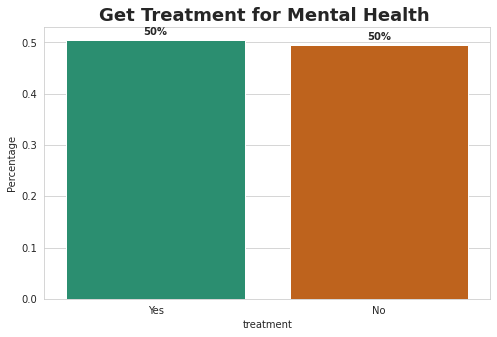

In [217]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment for Mental Health ', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Our target variable is "treatment" which answers the question "Have you get treatment for a mental health condition?". From the diagram, the percentage of responders who have got treatment is 50% which is pretty high. It indicates that tech companies need to put more attention on promoting mental health and supporting employees on mental health issues.

Next, we'll explore the attributes from the four categories to see the relationship with the mental illness treatment.

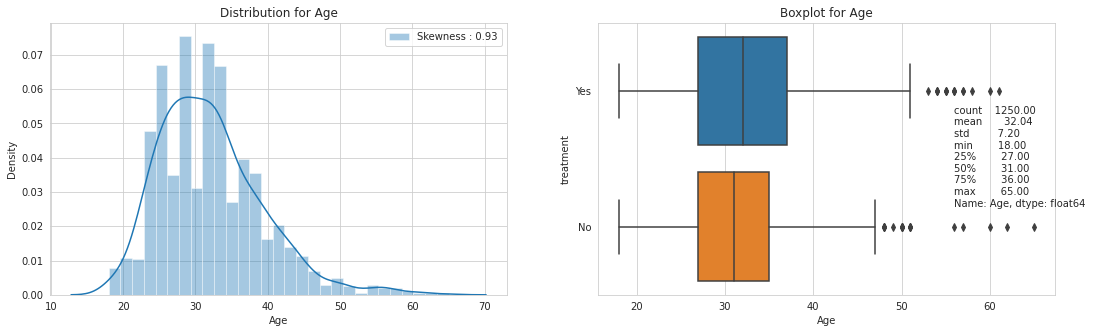

In [218]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'], label = 'Skewness : %.2f'%(df['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "treatment", data = df)
plt.title('Boxplot for Age')
age = str(df['Age'].describe().round(2))
plt.text(56, 0.85, age)
plt.show()

In this survey, most employees age 25 to early 40s. The distribution of ages is right-skewed which matches the tech industry tends to have younger employees. 

From the boxplot above, there is no huge difference of age between employees who get treattment or not.

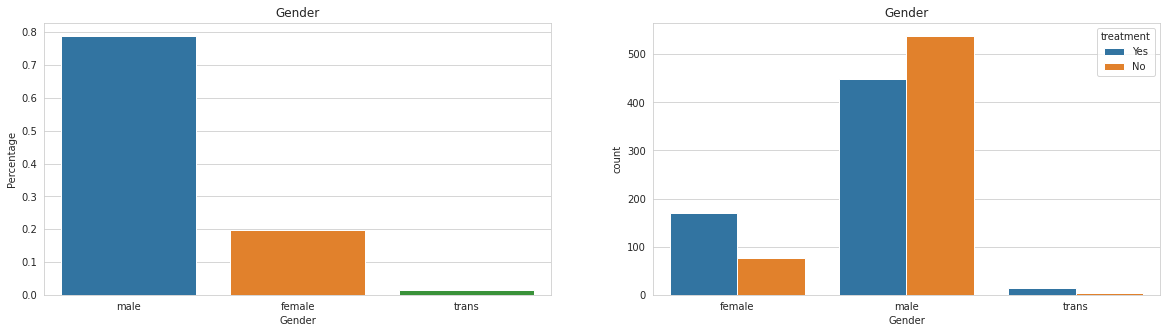

In [219]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
percentage = df['Gender'].value_counts(normalize = True).rename_axis('Gender').reset_index(name = 'Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data = percentage.head(10))
plt.title('Gender')
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['treatment'])
plt.title('Gender')
plt.show()

Almost 80% of responders are male. However, larger proportion of female responders have sought treatments than male responders. That could be caused by the pressure from large gap between the proportion of male and female employees in the tech workspaces.

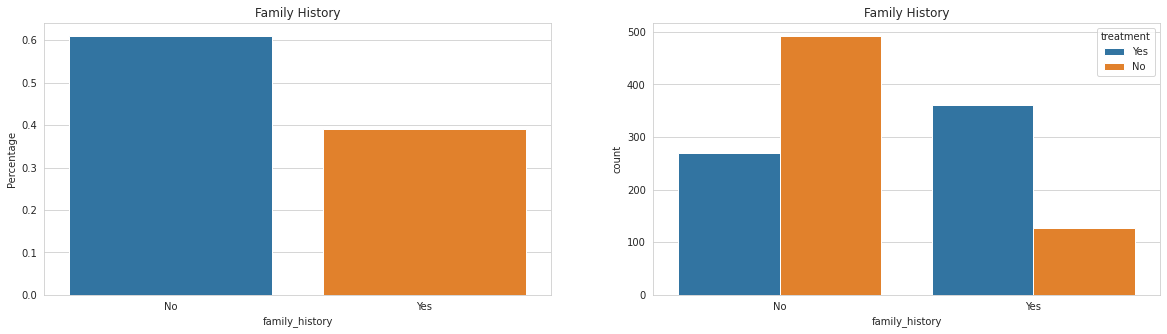

In [220]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
sns.barplot(x = 'family_history', y = 'Percentage', data = percentage)
plt.title('Family History')
plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'])
plt.title('Family History')
plt.show()

Around 40% of responders have a family history of mental problem. These responders with family history of mental illness were more likely to seek treatment than the other groups, because family history is a significant factor for mental health.

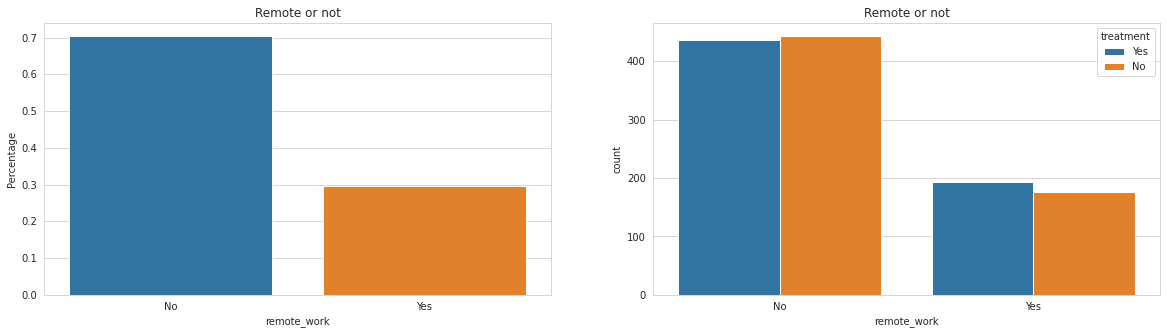

In [221]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
sns.barplot(x = 'remote_work', y = 'Percentage', data = percentage)
plt.title('Remote or not')
plt.subplot(1,2,2)
sns.countplot(df['remote_work'], hue = df['treatment'])
plt.title('Remote or not')
plt.show()

The survey was conducted in 2014. Only about 30% responders worked remotely at that time. For those who worked remotely, the percentage of seeking treatment is slightly higher.

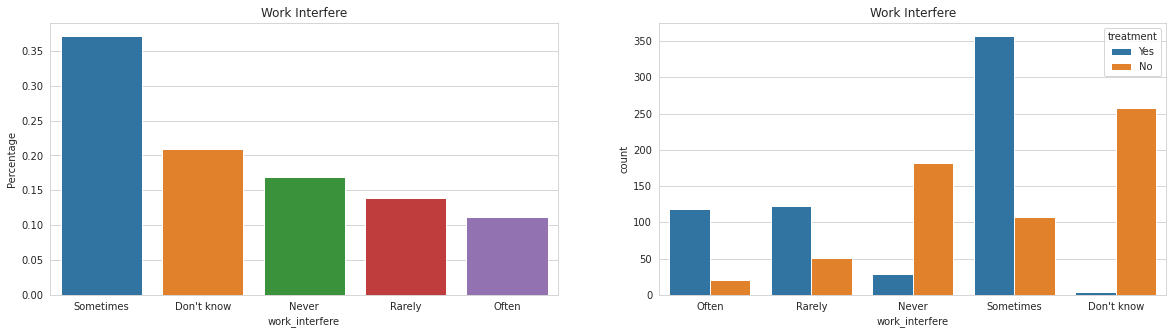

In [222]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'work_interfere', y = 'Percentage', data = percentage)
plt.title('Work Interfere')
plt.subplot(1,2,2)
sns.countplot(df['work_interfere'], hue = df['treatment'])
plt.title('Work Interfere')
plt.show()

For work interfere, around 37% say if they have mental health condition, they feel that it interferes with their work sometimes. Larger porportion of this group would seek treatment.

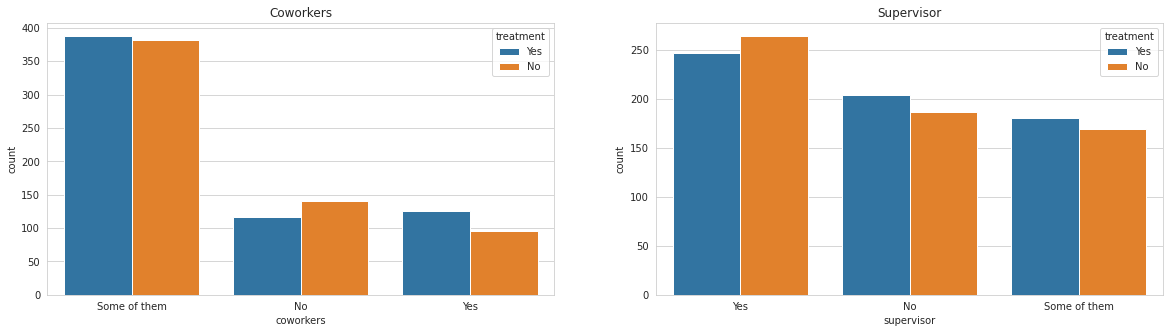

In [223]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(df['coworkers'], hue = df['treatment'])
plt.title('Coworkers')
plt.subplot(1,2,2)
sns.countplot(df['supervisor'], hue = df['treatment'])
plt.title('Supervisor')
plt.show()

Regarding the question, 'Would you be willing to discuss a mental health issue with your coworkers?', responders who answer yes have higher possibility to get treatment. 

The survey also asks if the responders are willing to discuss a mental health issue with their direct supervisor.There are more people say yes to discuss with their supervisors, over 50% of them do not get a treatment. Talking to someone with a higher level may be helpful for their mental health condiction.

# Encoding

In [224]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61] 
GENDER :['female' 'male' 'trans'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTERVIEW :['May

In [225]:
le = LabelEncoder()
dfencode = df.copy()

In [226]:
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
for col in object_cols:
    le.fit(dfencode[col])
    dfencode[col] = le.transform(dfencode[col])

In [227]:
dfencode.head()

,Timestamp,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,0,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,2014-08-27 11:29:37,44,1,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,2014-08-27 11:29:44,32,1,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,2014-08-27 11:29:46,31,1,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,2014-08-27 11:30:22,31,1,0,0,0,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0


Run correlation heatmap

It is important to see whether the dependent variables have any relationships with target variable.

In [228]:
corr = dfencode.corr(method="spearman")
corr

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.067082,0.074379,0.020262,0.068120,0.050687,0.016107,0.142302,-0.057162,0.157818,...,0.039896,0.007599,0.032821,-0.036222,0.003710,0.007219,0.062741,-0.009706,-0.012938,0.046345
Gender,0.067082,1.000000,0.035909,-0.131841,-0.157417,-0.088686,0.024291,0.003100,0.061665,-0.097850,...,-0.026185,0.034225,0.029412,0.026126,0.053775,0.076461,-0.055973,-0.031482,-0.011733,-0.047310
self_employed,0.074379,0.035909,1.000000,0.002911,0.016733,0.040300,-0.330170,0.314619,0.075858,-0.061450,...,0.102070,0.178654,0.025741,0.010170,0.073500,0.036865,-0.028039,-0.030967,0.125921,0.068590
family_history,0.020262,-0.131841,0.002911,1.000000,0.376067,0.316552,-0.046526,0.012760,-0.047636,0.128271,...,0.063607,0.026732,0.019634,-0.004990,-0.002673,0.001512,0.041051,0.041386,0.046671,0.115500
treatment,0.068120,-0.157417,0.016733,0.376067,1.000000,0.598370,-0.042632,0.025321,-0.030903,0.224420,...,0.144256,0.071898,0.019651,-0.015956,0.070142,-0.034721,0.094681,0.049311,0.070932,0.151016
work_interfere,0.050687,-0.088686,0.040300,0.316552,0.598370,1.000000,-0.059978,0.036784,0.009403,0.125236,...,0.061926,0.066029,0.048798,-0.027349,0.005705,-0.097759,0.103471,-0.016822,0.059677,0.135262
no_employees,0.016107,0.024291,-0.330170,-0.046526,-0.042632,-0.059978,1.000000,-0.214375,-0.120911,0.132919,...,0.000973,-0.097369,-0.005254,-0.066664,-0.094952,-0.061153,0.033738,0.036160,-0.021057,-0.004233
remote_work,0.142302,0.003100,0.314619,0.012760,0.025321,0.036784,-0.214375,1.000000,0.135023,-0.071384,...,-0.006659,0.093734,0.057578,-0.014329,0.077978,0.022853,-0.040377,-0.023638,0.028526,-0.046322
tech_company,-0.057162,0.061665,0.075858,-0.047636,-0.030903,0.009403,-0.120911,0.135023,1.000000,-0.044666,...,-0.059173,0.039347,0.009183,0.064433,0.072182,0.051705,-0.047031,-0.034736,0.012749,-0.062869
benefits,0.157818,-0.097850,-0.061450,0.128271,0.224420,0.125236,0.132919,-0.071384,-0.044666,1.000000,...,0.330265,0.066713,-0.015717,-0.030624,-0.007600,0.023556,0.035645,0.032771,0.139888,0.062371


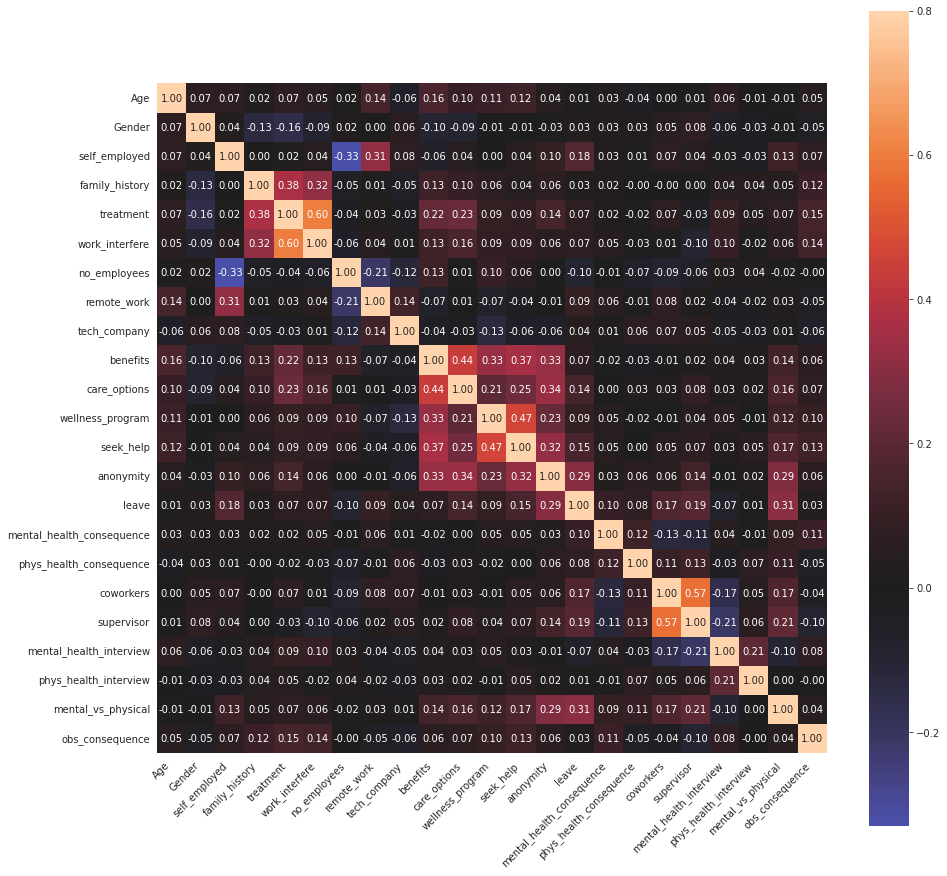

In [229]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr,
            vmax=.8, 
            center = 0,
            square=True,
            cbar=True, 
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10},
            color='green' 
           )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

**We can see some positive correlations between the variables:**
Work interfere vs. treatment and family history: Having family history, or seeking treatment, may indicate that the responder has high probability to get work interfered by mental condition. number of employees vs. benefits, wellness program and seek help. Larger company can afford better mental health facilities. Benefit, care options, wellness program, seek help, anonymity: These 5 variables are pair-wised correlated. They are all indicators about the supports from employers. Coworkers vs. supervisors vs. mental health interview: People are willing to discuss the mental condition with coworkers usually also are willing to discuss it with supervisors, and during interview. Physical health interview vs. mental health interview: People are willing to discuss physical health issues during interview also are willing to discuss mental health issues during interview.

**Negative correlations:**
Mental health consequences vs. mental-physical, mental health interview, supervisors and coworkers: When employees perceive more negative consequences about mental condition, they also tend to think that the employers do not take mental health as seriously as physical health, and are not willing to talk about mental health during interview or to supervisor or to coworks. Observed sequence vs. mental vs physical: If the employer takes mental health as seriously as physical health, the employee tends to not observed or heard of negative consequences about mental conditions.

**Now, let's focus on correlations with "treatment" variables.**

In [230]:
corr_mat = dfencode.corr()
corr_mat

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.067751,0.075854,0.003675,0.070164,0.040788,0.029288,0.142003,-0.049431,0.152279,...,0.027887,-0.011632,0.032221,-0.045506,-0.007608,0.004687,0.062833,-0.024435,-0.007535,0.061374
Gender,0.067751,1.000000,0.035267,-0.128249,-0.151373,-0.089456,0.026645,0.002027,0.059041,-0.093233,...,-0.022193,0.035631,0.026937,0.019443,0.053414,0.072111,-0.045849,-0.015080,-0.010654,-0.044123
self_employed,0.075854,0.035267,1.000000,0.002911,0.016733,0.038597,-0.335913,0.314619,0.075858,-0.055376,...,0.097806,0.168266,0.020526,0.012023,0.073675,0.036628,-0.024563,-0.026736,0.131839,0.068590
family_history,0.003675,-0.128249,0.002911,1.000000,0.376067,0.323940,-0.050156,0.012760,-0.047636,0.126620,...,0.060630,0.017920,0.025673,-0.001538,-0.002505,0.001481,0.037824,0.035344,0.040050,0.115500
treatment,0.070164,-0.151373,0.016733,0.376067,1.000000,0.616119,-0.048147,0.025321,-0.030903,0.224037,...,0.143013,0.060104,0.027956,-0.013122,0.070239,-0.034300,0.093321,0.049111,0.063594,0.151016
work_interfere,0.040788,-0.089456,0.038597,0.323940,0.616119,1.000000,-0.063133,0.039181,0.005065,0.135999,...,0.063774,0.052228,0.060007,-0.020022,0.007730,-0.096576,0.102155,-0.015290,0.049654,0.137551
no_employees,0.029288,0.026645,-0.335913,-0.050156,-0.048147,-0.063133,1.000000,-0.212708,-0.109110,0.115920,...,-0.002178,-0.089439,-0.004233,-0.066274,-0.088215,-0.052296,0.023125,0.029218,-0.023695,-0.012357
remote_work,0.142003,0.002027,0.314619,0.012760,0.025321,0.039181,-0.212708,1.000000,0.135023,-0.069601,...,-0.006117,0.096844,0.055654,-0.013226,0.078298,0.021160,-0.036537,-0.019186,0.034200,-0.046322
tech_company,-0.049431,0.059041,0.075858,-0.047636,-0.030903,0.005065,-0.109110,0.135023,1.000000,-0.043042,...,-0.056347,0.044355,0.000923,0.062240,0.072392,0.051301,-0.043491,-0.034253,0.022187,-0.062869
benefits,0.152279,-0.093233,-0.055376,0.126620,0.224037,0.135999,0.115920,-0.069601,-0.043042,1.000000,...,0.338040,0.065174,-0.010316,-0.031316,-0.007918,0.024600,0.032895,0.021748,0.141264,0.064360


<AxesSubplot:>

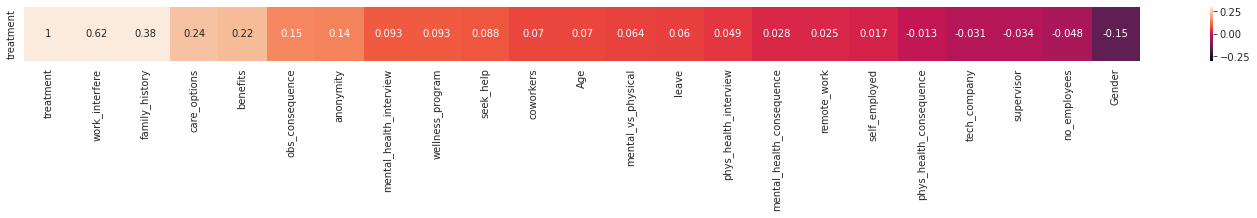

In [231]:
corr_treatment = corr_mat['treatment'].sort_values(ascending=False).to_frame().T
plt.subplots(figsize=(25,1))
sns.heatmap(corr_treatment, vmin = -.3, vmax=.3, annot=True)

The top 9 highly correlated with treatment is: work_interfere, family history, care options, Gender, obs consequence, benefits, leave, mental health consequence, anonymity

For Gender variable, we can see female gender is positively correlated with treatment, while male gender is the opposite: negatively correlated the "treatment" target. That is consistent with our observation in preliminary analysis that female responders tend to seek treatment more often.

The top 9 variables are also consistent with our preliminary analysis.

Check the correlations between the 9 variables.

In [232]:
Top_corr=['work_interfere', 'family_history', 'care_options', 'benefits',
       'obs_consequence', 'anonymity', 'mental_health_interview',
       'wellness_program', 'Gender']

# Model

**Prediction Model**

I will try these base models and ensemble models to predict whether or not a responder has sought for treatment in a mental health condition from these features. For this task, I evaluated the following algorithms:

**Random Forest:** This model uses lots of decision trees to classifies the dataset into smaller subsets, and to define a conclusion about a target value. The tree consists of leaves, where the intermediate ones are the decision nodes and the ones from the extremes are the final outcomes. This model was chosen, because it can be easily interpreted, visualized and explained. Also due the fact that this model implicitly perform variable screening or feature selection.

**Naive Bayes：** (GaussianNB): This model is a classification technique based on the Bayes' Theorem. It assumes the independence among the involved features. Nevertheless, this approach performers well even on data that are dependent between them. This algorithm was created by Bayes to prove the existence of God. It relies on the probability of an event, based on prior knowledge of conditions that might be related to the event. This model was chosen, because this family of algorithms can predict well with small set of data and when there is a large number of features comparatively.

**K-nearest neighbors (KNN):** This algorithm takes in consideration the k closest points (neighbors) around the target and use them learn how to classify the desired point. This model was chosen, because its simple to implement, no assumption about the data is necessary and the non-parametric nature of KNN gives an advantage in certain settings where the data may be highly unusual.

**XGBoost:** This is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

**LDA:** is an unsupervised learning algorithm that attempts to describe a set of observations as a mixture of distinct categories. LDA is most commonly used to discover a user-specified number of topics shared by documents within a text corpus.This model was chosen, because provides probabilities for outcomes and a convenient probability scores for observations.

**Neural Network:** adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. The concept of neural networks, which has its roots in artificial intelligence, is swiftly gaining popularity in the development of trading systems.

**Model**

**Random Forest, Gaussian naive Bayes, K-nearest neighbors, Logistic regression, XGBoost, LDA, Neural Network**

In [233]:
X=dfencode[['work_interfere', 'family_history', 'care_options', 'benefits',
       'obs_consequence', 'anonymity', 'mental_health_interview',
       'wellness_program', 'seek_help']]

In [234]:
X

,work_interfere,family_history,care_options,benefits,obs_consequence,anonymity,mental_health_interview,wellness_program,seek_help
0,2,0,1,2,0,2,1,1,2
1,3,0,0,0,0,0,1,0,0
2,3,0,0,1,0,0,2,1,1
3,2,1,2,1,1,1,0,1,1
4,1,0,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
1254,0,0,0,1,0,0,1,1,1
1255,2,1,2,2,0,2,1,1,1
1256,4,1,2,2,0,0,1,1,1
1257,0,0,2,1,0,0,1,1,1


In [235]:
y = dfencode["treatment"]

In [236]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: treatment, Length: 1250, dtype: int64

Feature Normalization

In [237]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Training / Testing set split

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, stratify = y, random_state=30) 

In [239]:
X_test

array([[-0.18355047, -0.80026242,  1.21166515, ..., -2.03968502,
         1.68540583,  1.58104851],
       [-0.81043048, -0.80026242,  1.21166515, ...,  0.31235029,
        -1.79971789, -1.31040817],
       [ 1.07020956,  1.2495901 ,  0.05549611, ...,  0.31235029,
        -0.05715603,  0.13532017],
       ...,
       [ 1.07020956, -0.80026242, -1.10067292, ...,  0.31235029,
        -0.05715603,  0.13532017],
       [ 1.07020956, -0.80026242,  1.21166515, ...,  0.31235029,
         1.68540583,  1.58104851],
       [-0.81043048,  1.2495901 ,  1.21166515, ...,  0.31235029,
        -1.79971789,  1.58104851]])

### Random Forest

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       155
           1       0.79      0.85      0.82       158

    accuracy                           0.81       313
   macro avg       0.82      0.81      0.81       313
weighted avg       0.82      0.81      0.81       313



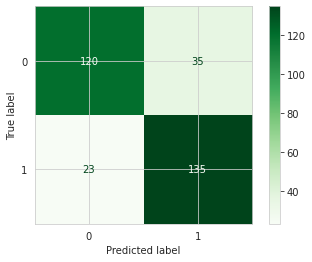

In [240]:
RandomForest = RandomForestClassifier()
model_rf = RandomForest.fit(X_train, y_train)
pred = model_rf.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_rf, X = X_test, y_true = y_test,cmap = 'Greens');

In [241]:
accuracy_rf=accuracy_score(y_test,pred)
recall=recall_score(y_test,pred)
precision=precision_score(y_test,pred)
print("Random forest's accuracy = ",accuracy_rf )
print("Random forest's recall= ",recall)
print("Random forest's precision= ",precision,"\n" )

Random forest's accuracy =  0.8146964856230032
Random forest's recall=  0.8544303797468354
Random forest's precision=  0.7941176470588235 



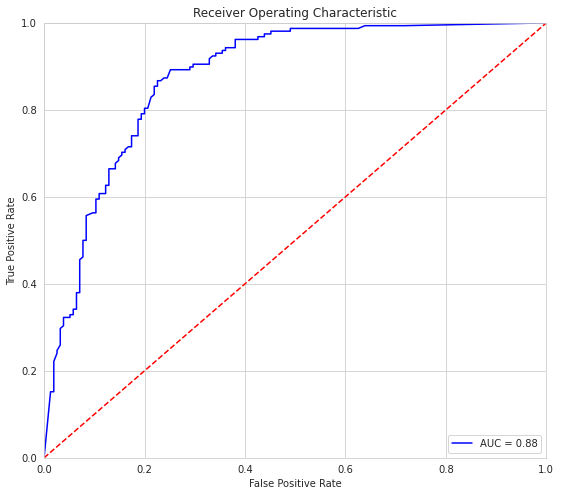

In [242]:
pred_prob = model_rf.predict_proba(X_test)
pred_prob = pred_prob[:,1]
metrics.roc_auc_score(y_test, pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost - Classification

[09:09:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       155
           1       0.78      0.84      0.80       158

    accuracy                           0.80       313
   macro avg       0.80      0.80      0.80       313
weighted avg       0.80      0.80      0.80       313

XGBoost's accuracy =  0.7955271565495208
XGBoost's recall=  0.8354430379746836
XGBoost's precision=  0.7764705882352941 



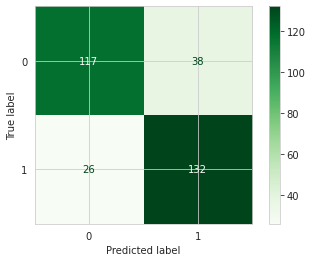

In [243]:
warnings.filterwarnings("ignore")
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_xgb, X = X_test, y_true = y_test, cmap = 'Greens');
accuracy_xgb=accuracy_score(y_test,pred)

recall=recall_score(y_test,pred)
precision=precision_score(y_test,pred)


print("XGBoost's accuracy = ",accuracy_xgb )
print("XGBoost's recall= ",recall)
print("XGBoost's precision= ",precision,"\n" )

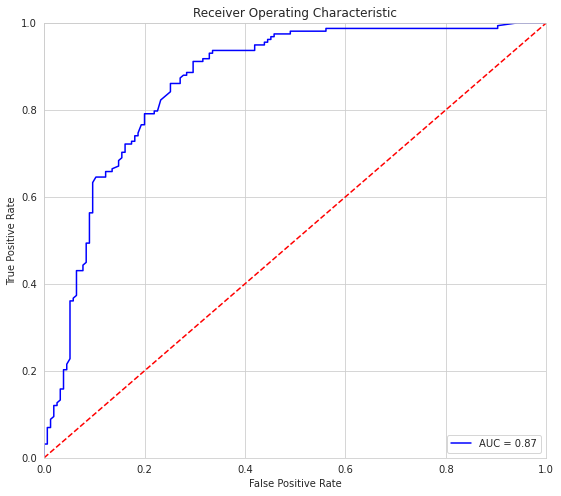

In [244]:
pred_prob = model_xgb.predict_proba(X_test)
pred_prob = pred_prob[:,1]
metrics.roc_auc_score(y_test, pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naive Bayes

In [245]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred = model_nb.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       155
           1       0.78      0.80      0.79       158

    accuracy                           0.78       313
   macro avg       0.78      0.78      0.78       313
weighted avg       0.78      0.78      0.78       313

Naive Bayes' accuracy =  0.7827476038338658
Naive Bayes's recall=  0.7974683544303798
Naive Bayes's precision=  0.7777777777777778 



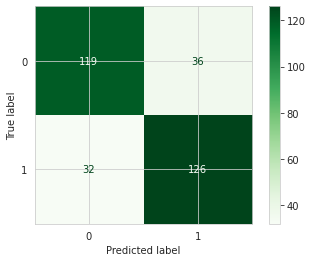

In [246]:
pred  = model_nb.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_nb, X = X_test, y_true = y_test, cmap='Greens');
accuracy_nb=accuracy_score(y_test,pred)
recall=recall_score(y_test,pred)
precision=precision_score(y_test,pred)
print("Naive Bayes' accuracy = ",accuracy_nb )
print("Naive Bayes's recall= ",recall)
print("Naive Bayes's precision= ",precision,"\n" )

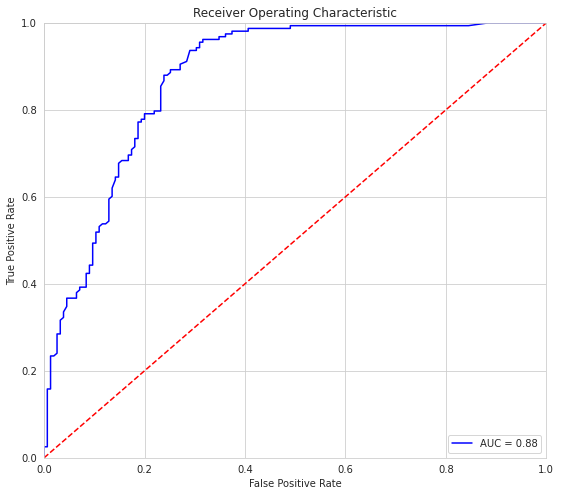

In [247]:
pred_prob = model_nb.predict_proba(X_test)
pred_prob = pred_prob[:,1]
metrics.roc_auc_score(y_test, pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Knn

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       155
           1       0.77      0.87      0.82       158

    accuracy                           0.81       313
   macro avg       0.81      0.80      0.80       313
weighted avg       0.81      0.81      0.80       313

KNN accuracy =  0.805111821086262
KNN's recall=  0.8734177215189873
KNN's precision=  0.770949720670391 



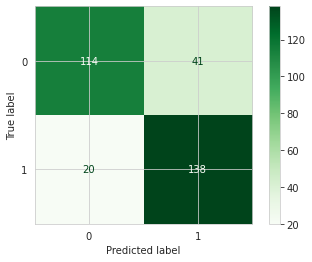

In [248]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
pred = model_knn.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_knn, X = X_test, y_true = y_test, cmap='Greens');
accuracy_nb=accuracy_score(y_test,pred)
recall=recall_score(y_test,pred)
precision=precision_score(y_test,pred)
print("KNN accuracy = ",accuracy_nb )
print("KNN's recall= ",recall)
print("KNN's precision= ",precision,"\n" )

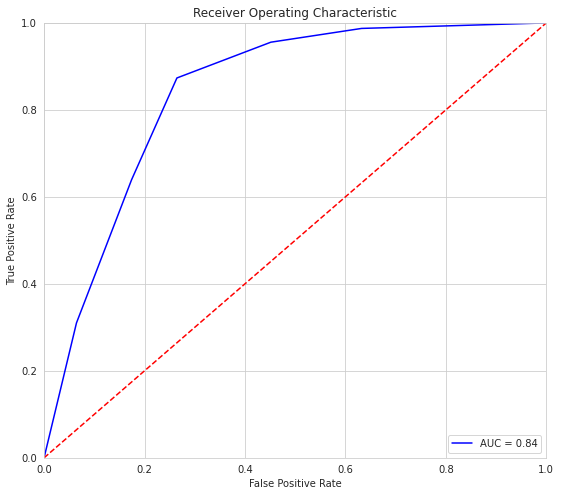

In [249]:
pred_prob = model_knn.predict_proba(X_test)
pred_prob = pred_prob[:,1]
metrics.roc_auc_score(y_test, pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LDA

In [250]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
pred = model_nb.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       155
           1       0.80      0.92      0.86       158

    accuracy                           0.84       313
   macro avg       0.85      0.84      0.84       313
weighted avg       0.85      0.84      0.84       313

LDA' accuracy =  0.8434504792332268
LDA's recall=  0.9177215189873418
LDA's precision=  0.8011049723756906 



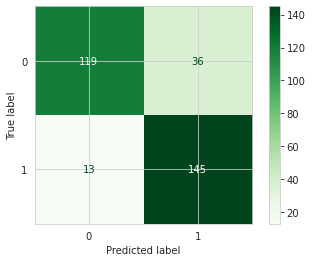

In [251]:
pred  = model_lda.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_lda, X = X_test, y_true = y_test, cmap='Greens');
accuracy_lda=accuracy_score(y_test,pred)
recall_lda=recall_score(y_test,pred)
precision_lda=precision_score(y_test,pred)
print("LDA' accuracy = ",accuracy_lda )
print("LDA's recall= ",recall_lda)
print("LDA's precision= ",precision_lda,"\n" )

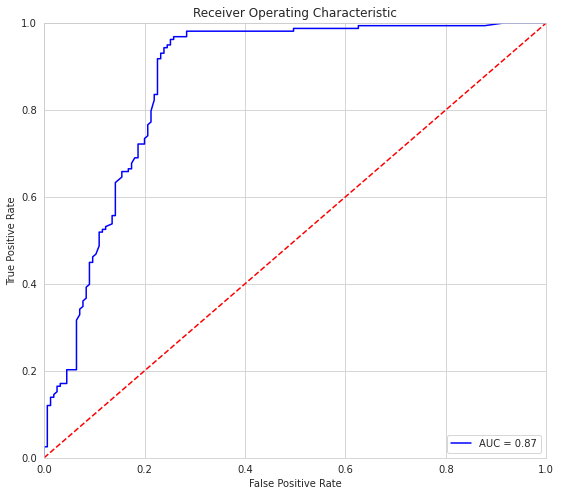

In [252]:
pred_prob = model_lda.predict_proba(X_test)
pred_prob = pred_prob[:,1]
metrics.roc_auc_score(y_test, pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Neural Network

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       155
           1       0.74      0.82      0.78       158

    accuracy                           0.76       313
   macro avg       0.77      0.76      0.76       313
weighted avg       0.77      0.76      0.76       313

Neural Network's accuracy =  0.7635782747603834
Neural Network's recall=  0.8164556962025317
Neural Network's precision=  0.7413793103448276 



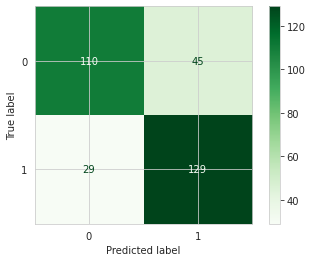

In [253]:
model_nn = MLPClassifier(hidden_layer_sizes =(150,100,50),max_iter= 300, activation = 'relu', solver = 'adam', random_state = 1)
model_nn.fit(X_train,y_train)
pred = model_nn.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_nn, X = X_test, y_true = y_test, cmap='Greens');
accuracy_nb=accuracy_score(y_test,pred)
recall=recall_score(y_test,pred)
precision=precision_score(y_test,pred)
print("Neural Network's accuracy = ",accuracy_nb )
print("Neural Network's recall= ",recall)
print("Neural Network's precision= ",precision,"\n" )



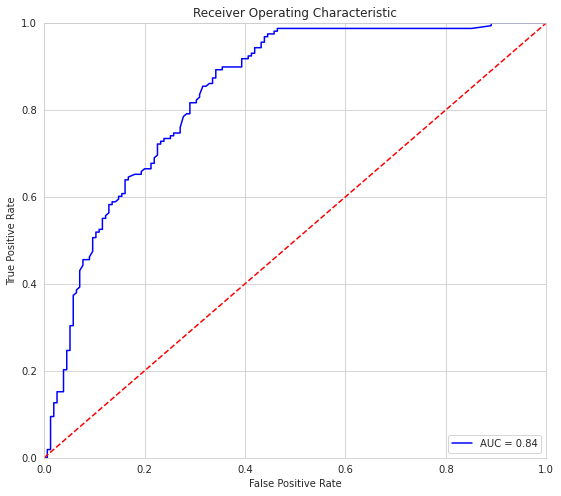

In [254]:
pred_prob = model_nn.predict_proba(X_test)
pred_prob = pred_prob[:,1]
metrics.roc_auc_score(y_test, pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion

## Conclusion 1:
#### In this study, we analyzed and finally identified nine influential factors that most affect the mental state of employees. In terms of importance, they are：work_interfere, family history, care options, Gender, obs consequence, benefits, leave, mental health consequence, anonymity. And we analyzed how we can better improve employee well-being, how to encourage employees to actively seek mental treatment when necessary.

## conclusion 2:
#### Six different algorithms were used to predict the mental state of future employees and to predict whether they would need mental treatment such as counseling.
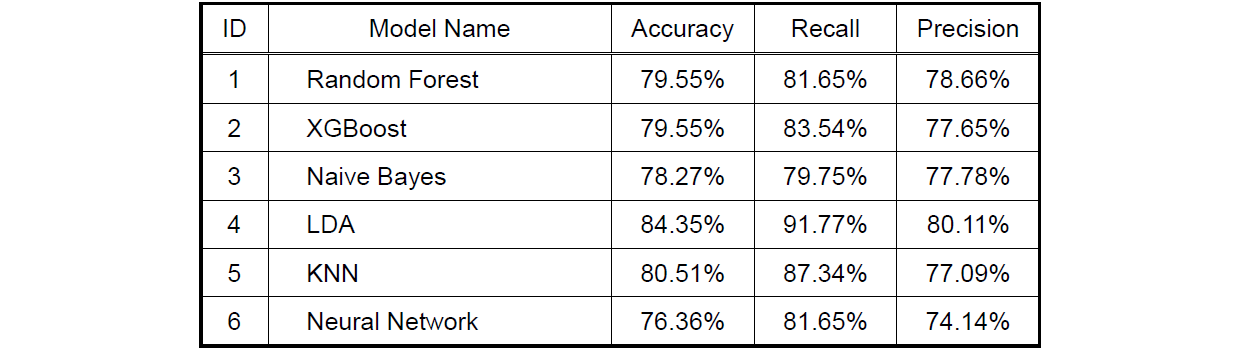
#### By comparing the accuracy of the models, we found the best model:Linear Discriminant Analysis(LDA), with an accuracy of 84.35%, a recall of 91.77% and precision of 80.11%, which proves that we can effectively identify 91.77% of the employees who need mental treatment. Such efficient and accurate prediction model can help companies save a lot of labor cost, help employees get better mental state, improve work efficiency, increase performance, etc.

# Data Resource

https://osmihelp.org/research